In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [24]:
class Measurement:
  def __init__(self, dU, T, tau):
    self.dU = dU * 10**-6
    self.dT = 0
    self.T = T + 273.15
    self.tau = tau * 10**-6

    self.k = 24*1000 # K / V
    self.tau_0 = 6.9092 * 10**-6 # sec

  def cvt_dU_dT(self):
    self.dT = self.k * self.dU
    self.err_dT = 12*10**-7 * self.k

  def calc_f_T(self):
    self.f_T = 1/(self.tau**2 - self.tau_0**2)
    self.true_T = self.T + self.dT

  def display(self):
    print(f"mes: dU = {self.dU}, dT = {self.dT}, T = {self.T}, tau = {self.tau}")

In [25]:
mess = [Measurement(-3, 14.25, 7.9201),
        Measurement(-5, 16.12, 7.8595),
        Measurement(-4, 18.13, 7.7485),
        Measurement(-4, 20.11, 7.5733),
        Measurement(-4, 22.08, 7.3712),
        Measurement(-6, 24.10, 7.2031),
        Measurement(-4, 26.08, 7.1261),
        Measurement(-5, 28.07, 7.0852),
        Measurement(-5, 30.08, 7.0601),
        Measurement(-5, 32.08, 7.0405),
        Measurement(-4, 34.09, 7.0267),
        Measurement(-5, 36.08, 7.0170),
        Measurement(-5, 38.07, 7.0091),
        Measurement(-5, 40.07, 7.0028)]

for mes in mess:
  mes.cvt_dU_dT()
  mes.calc_f_T()
  mes.display()

mes: dU = -3e-06, dT = -0.07200000000000001, T = 287.4, tau = 7.920099999999999e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 289.27, tau = 7.8595e-06
mes: dU = -4e-06, dT = -0.096, T = 291.28, tau = 7.7485e-06
mes: dU = -4e-06, dT = -0.096, T = 293.26, tau = 7.573299999999999e-06
mes: dU = -4e-06, dT = -0.096, T = 295.22999999999996, tau = 7.3712e-06
mes: dU = -6e-06, dT = -0.14400000000000002, T = 297.25, tau = 7.2031e-06
mes: dU = -4e-06, dT = -0.096, T = 299.22999999999996, tau = 7.126099999999999e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 301.21999999999997, tau = 7.0852e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 303.22999999999996, tau = 7.0600999999999995e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 305.22999999999996, tau = 7.0405e-06
mes: dU = -4e-06, dT = -0.096, T = 307.24, tau = 7.0267e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 309.22999999999996, tau = 7.017e-06
mes: dU = -4.9999999999999996e-06, dT = -0.12, T = 311.21

In [26]:
x = [mes.true_T for mes in mess]
y = [mes.f_T for mes in mess]

sigma theta p =  1.4369171548626736
sigma theta k =  91.24783212329963


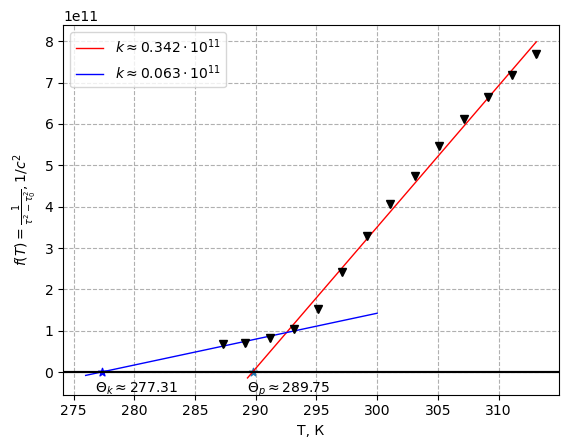

In [27]:
plt.figure()
plt.xlabel("T, К")
plt.ylabel("$f(T) = \\frac{1}{\\tau^2-\\tau_0^2}, 1/c^2$")
plt.title('')
plt.grid(True, linestyle = '--')
plt.errorbar(x, y, yerr=None, xerr=[mes.err_dT for mes in mess],
  ls='none', fmt='v', color = 'black', ecolor='black', capsize=2)

k, b, kerr, berr = LeastSquares(x[4:], y[4:])
x_ = np.array([min(x) + 2, max(x)])
plt.plot(x_, k*x_ + b, "-", linewidth = 1, color='red', label=f'$k \\approx {round(k / 1e11, 3)} \\cdot 10^{{11}} $')
plt.axhline(0, color = 'black')
plt.scatter(-b/k, 0, marker="*")
plt.text(-b/k - 0.5, -0.5e11, s=f"$\\Theta_p \\approx {round(-b/k, 2)}$")

print("sigma theta p = ", np.sqrt((berr/k)**2 + (b/k**2 * kerr)**2) / 10)

k, b, kerr, berr = LeastSquares(x[:4], y[:4])
x_ = np.array([276, 300])
plt.plot(x_, k*x_ + b, "-", linewidth = 1, color='blue', label=f'$k \\approx {round(k / 1e11, 3)} \\cdot 10^{{11}} $')
plt.axhline(0, color = 'black')
plt.scatter(-b/k, 0, marker="*", color = 'blue')
plt.text(-b/k - 0.5, -0.5e11, s=f"$\\Theta_k \\approx {round(-b/k, 2)}$")

print("sigma theta k = ", np.sqrt((berr/k)**2 + (b/k**2 * kerr)**2))

plt.legend()
plt.show()


